In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tests
### tests are defined in:
* lab1/tests/templates.hpp 
* lab1/tests/unit.cpp
* lab1/tests/stress.cpp

### to run:
* configure and build CMake Project in ./build
* run built executables in ./build/lab1/tests/

#### example:

In [22]:
!cmake build/
!cmake --build build/
!build/lab1/tests/stress 

CMake Error: The source directory "/home/pazamelin/github/ORA_labs/build" does not exist.
Specify --help for usage, or press the help button on the CMake GUI.
Error: /home/pazamelin/github/ORA_labs/build is not a directory
/usr/bin/sh: 1: build/lab1/tests/stress: not found


### or check out results [in the github workflow](https://github.com/pazamelin/ORA_labs/actions)

# Profiling

In [23]:
from typing import List, Any

def get(path_or_url):
    return pd.read_csv(path_or_url)

def plot_profiling(dataframes: List[pd.DataFrame],
                   pattern_sizes: List[int],
                   names: List[str]):
    # plot
    xsize = 15
    ysize = 5    
    max_xlabels = 50
    
    fig = plt.figure(figsize=(xsize, ysize))
    ax  = plt.axes()
    ax.xaxis.set_major_locator(plt.MaxNLocator(max_xlabels))
    
    plt.xticks(rotation=90)
    plt.xlabel('N')
    plt.ylabel('time')
    plt.grid()
    
    j = 0
    for dataframe in dataframes:
        for i in range (0, len(pattern_sizes)):
            text_sizes = dataframe['text_size']
            pattern_size = pattern_sizes[i]
            timings = dataframe['time_' + str(i)]            
            ax.plot(text_sizes, timings, label= names[j] + ', M = ' + str(pattern_size))            
        j += 1
        
    plt.legend(loc='upper left')
    plt.show() 

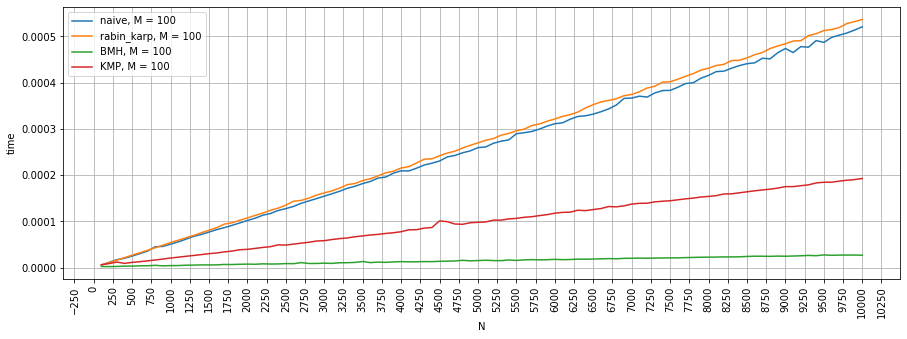

In [25]:
dataframes = []

filenames = ['naive', 'rabin_karp', 'BMH', 'KMP']
for name in filenames:    
    dataframes.append(get("lab1/profile/results/" + name + '.csv'))

plot_profiling(dataframes, [100], filenames)

#### N - text size, M - pattern size

# Benchmarking

### [check out the table](https://github.com/pazamelin/ORA_labs/blob/main/lab1/profile/results/benchmarking.csv)